In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

In [76]:
data = pd.read_csv("datatest_3.csv")
data['Date'] = pd.to_datetime(data['Date'], format="%b-%Y")
data.set_index('Date', inplace=True)
data.dropna(inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data = data.drop(columns=['LNG 145K CBM (Steam Turbine) Spot Rate\n(avg., $/day)',
                          'Aprox.\nShip on order', 'LNG Carrier Newbuilding Prices (end month, $m)', 
                          'Global price of Natural Gas, Asia (start month, MMBTU)',
                          'Global price of Natural Gas, EU (start month, MMBTU)',
                          'Global price of Natural Gas, US Henry Hub (start month, MMBTU)',
                          'LNG Orderbook (start month, CBM)'
                          ])

#Index(['LNG 145K CBM (Steam Turbine) Spot Rate\n(avg., $/day)',
#       'LNG 174K CBM (2-stroke dual fuel) Spot Rate\n(avg., $/day)',
#       'LNG Capacity (CBM)', 
#       'LNG Carrier Newbuilding Prices (end month, $m)',
#       'LNG Orderbook (start month, CBM)', 
#       'Aprox.\nShip on order',
#       'Global price of Natural Gas, Asia (start month, MMBTU)',
#       'Global price of Natural Gas, EU (start month, MMBTU)',
#       'Global price of Natural Gas, US Henry Hub (start month, MMBTU)',
#       'Spread\nEU-US', 'Spread\nASIA-US', 'Spread\nASIA-EU']





In [77]:
from statsmodels.tsa.stattools import adfuller

for col in data.columns:
    pval = adfuller(data[col])[1]
    if pval > 0.05:
        print(f"{col} is non-stationary, differencing...")
        data[col] = data[col].diff()

data.dropna(inplace=True)


LNG Capacity (CBM) is non-stationary, differencing...
Spread
EU-US is non-stationary, differencing...
Spread
ASIA-US is non-stationary, differencing...


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
display(scaled_data)


,"LNG 174K CBM (2-stroke dual fuel) Spot Rate\n(avg., $/day)",LNG Capacity (CBM),Spread\nEU-US,Spread\nASIA-US,Spread\nASIA-EU
Date,,,,,
2019-02-01,-0.412588,0.826868,-0.128669,-0.291918,0.050440
2019-03-01,-0.665571,-0.118834,-0.154517,-0.296831,-0.076982
2019-04-01,-0.663707,0.350359,-0.019441,-0.007785,-0.055557
2019-05-01,-0.463773,-0.174891,-0.104282,-0.024383,0.093701
2019-06-01,-0.401372,0.328497,-0.108584,-0.093848,0.157366
...,...,...,...,...,...
2024-08-01,-0.312271,0.345314,0.306571,0.256320,0.188208
2024-09-01,-0.433970,0.362131,-0.129202,-0.103349,0.275604
2024-10-01,-0.703291,3.293889,0.114572,-0.046743,0.007658


In [84]:
# 1. Difference to ensure stationarity
data_diff = data.diff().dropna()

# 2. Standardize after differencing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_diff), index=data_diff.index, columns=data_diff.columns)
display(scaled_data)


,"LNG 174K CBM (2-stroke dual fuel) Spot Rate\n(avg., $/day)",LNG Capacity (CBM),Spread\nEU-US,Spread\nASIA-US,Spread\nASIA-EU
Date,,,,,
2019-03-01,-0.353260,-0.681218,-0.019095,-0.005886,-0.124905
2019-04-01,0.014391,0.323042,0.097470,0.207667,0.021210
2019-05-01,0.300133,-0.382791,-0.061827,-0.014375,0.146698
2019-06-01,0.101724,0.347312,-0.003489,-0.052781,0.062676
2019-07-01,-0.048762,-1.037695,0.084168,0.062769,-0.022020
...,...,...,...,...,...
2024-08-01,0.033871,-0.356133,0.227353,0.161352,-0.197137
2024-09-01,-0.163866,0.001956,-0.316024,-0.263606,0.085971
2024-10-01,-0.376830,2.070913,0.176205,0.038805,-0.262851


In [89]:
model = VAR(scaled_data)
lag_selection = model.select_order(maxlags=10)
print(lag_selection.summary())
best_lag = lag_selection.aic
model_fit = model.fit(best_lag)

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -1.933      -1.759      0.1447      -1.865
1      -40.60*     -39.55*  2.338e-18*     -40.19*
2       -33.24      -31.32   3.735e-15      -32.49
3       -31.72      -28.93   1.794e-14      -30.63
4       -31.73      -28.06   1.944e-14      -30.29
5       -30.00      -25.47   1.268e-13      -28.23
6       -29.72      -24.31   2.154e-13      -27.60
7       -29.83      -23.55   2.809e-13      -27.37
8       -28.80      -21.65   1.416e-12      -26.00
9       -28.45      -20.42   5.128e-12      -25.31
10      -30.14      -21.24   4.721e-12      -26.66
--------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [91]:
from statsmodels.tsa.api import VAR

model = VAR(scaled_data)

best_aic = float('inf')
best_lag = 1
best_model_fit = None

for lag in range(1, 10):
    try:
        fit = model.fit(lag)
        if fit.aic < best_aic:
            best_aic = fit.aic
            best_lag = lag
            best_model_fit = fit
    except np.linalg.LinAlgError:
        print(f"Lag {lag} failed due to matrix error.")
        continue

print(f"✅ Best lag selected: {best_lag} (AIC = {best_aic})")


Lag 1 failed due to matrix error.
✅ Best lag selected: 2 (AIC = -32.72523252890164)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

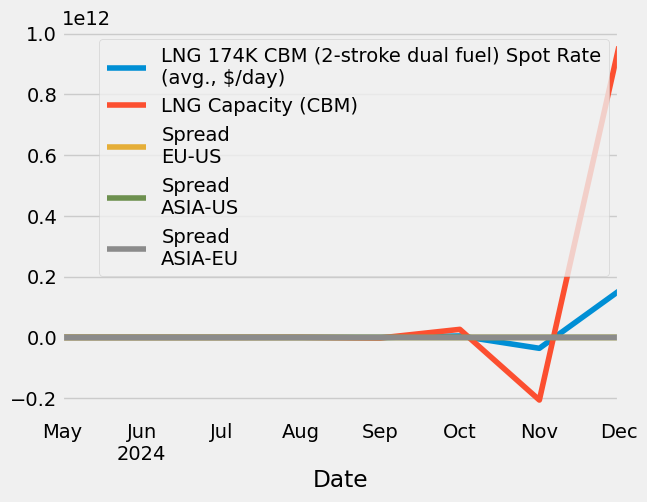

In [92]:
forecast = best_model_fit.forecast(scaled_data.values[-best_lag:], steps=len(test))
forecast_inverse = scaler.inverse_transform(forecast)
forecast_df = pd.DataFrame(forecast_inverse, index=test.index, columns=data.columns)

forecast_df.plot()

mean_squared_error: {'LNG 174K CBM (2-stroke dual fuel) Spot Rate\n(avg., $/day)': 3335325567.8122587, 'LNG Capacity (CBM)': 275752281561.512, 'LNG Orderbook (start month, CBM)': 4400221049457.038, 'Spread\nEU-US': 1.4418408416139554, 'Spread\nASIA-US': 0.46246425088828247, 'Spread\nASIA-EU': 0.6924568595848958}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


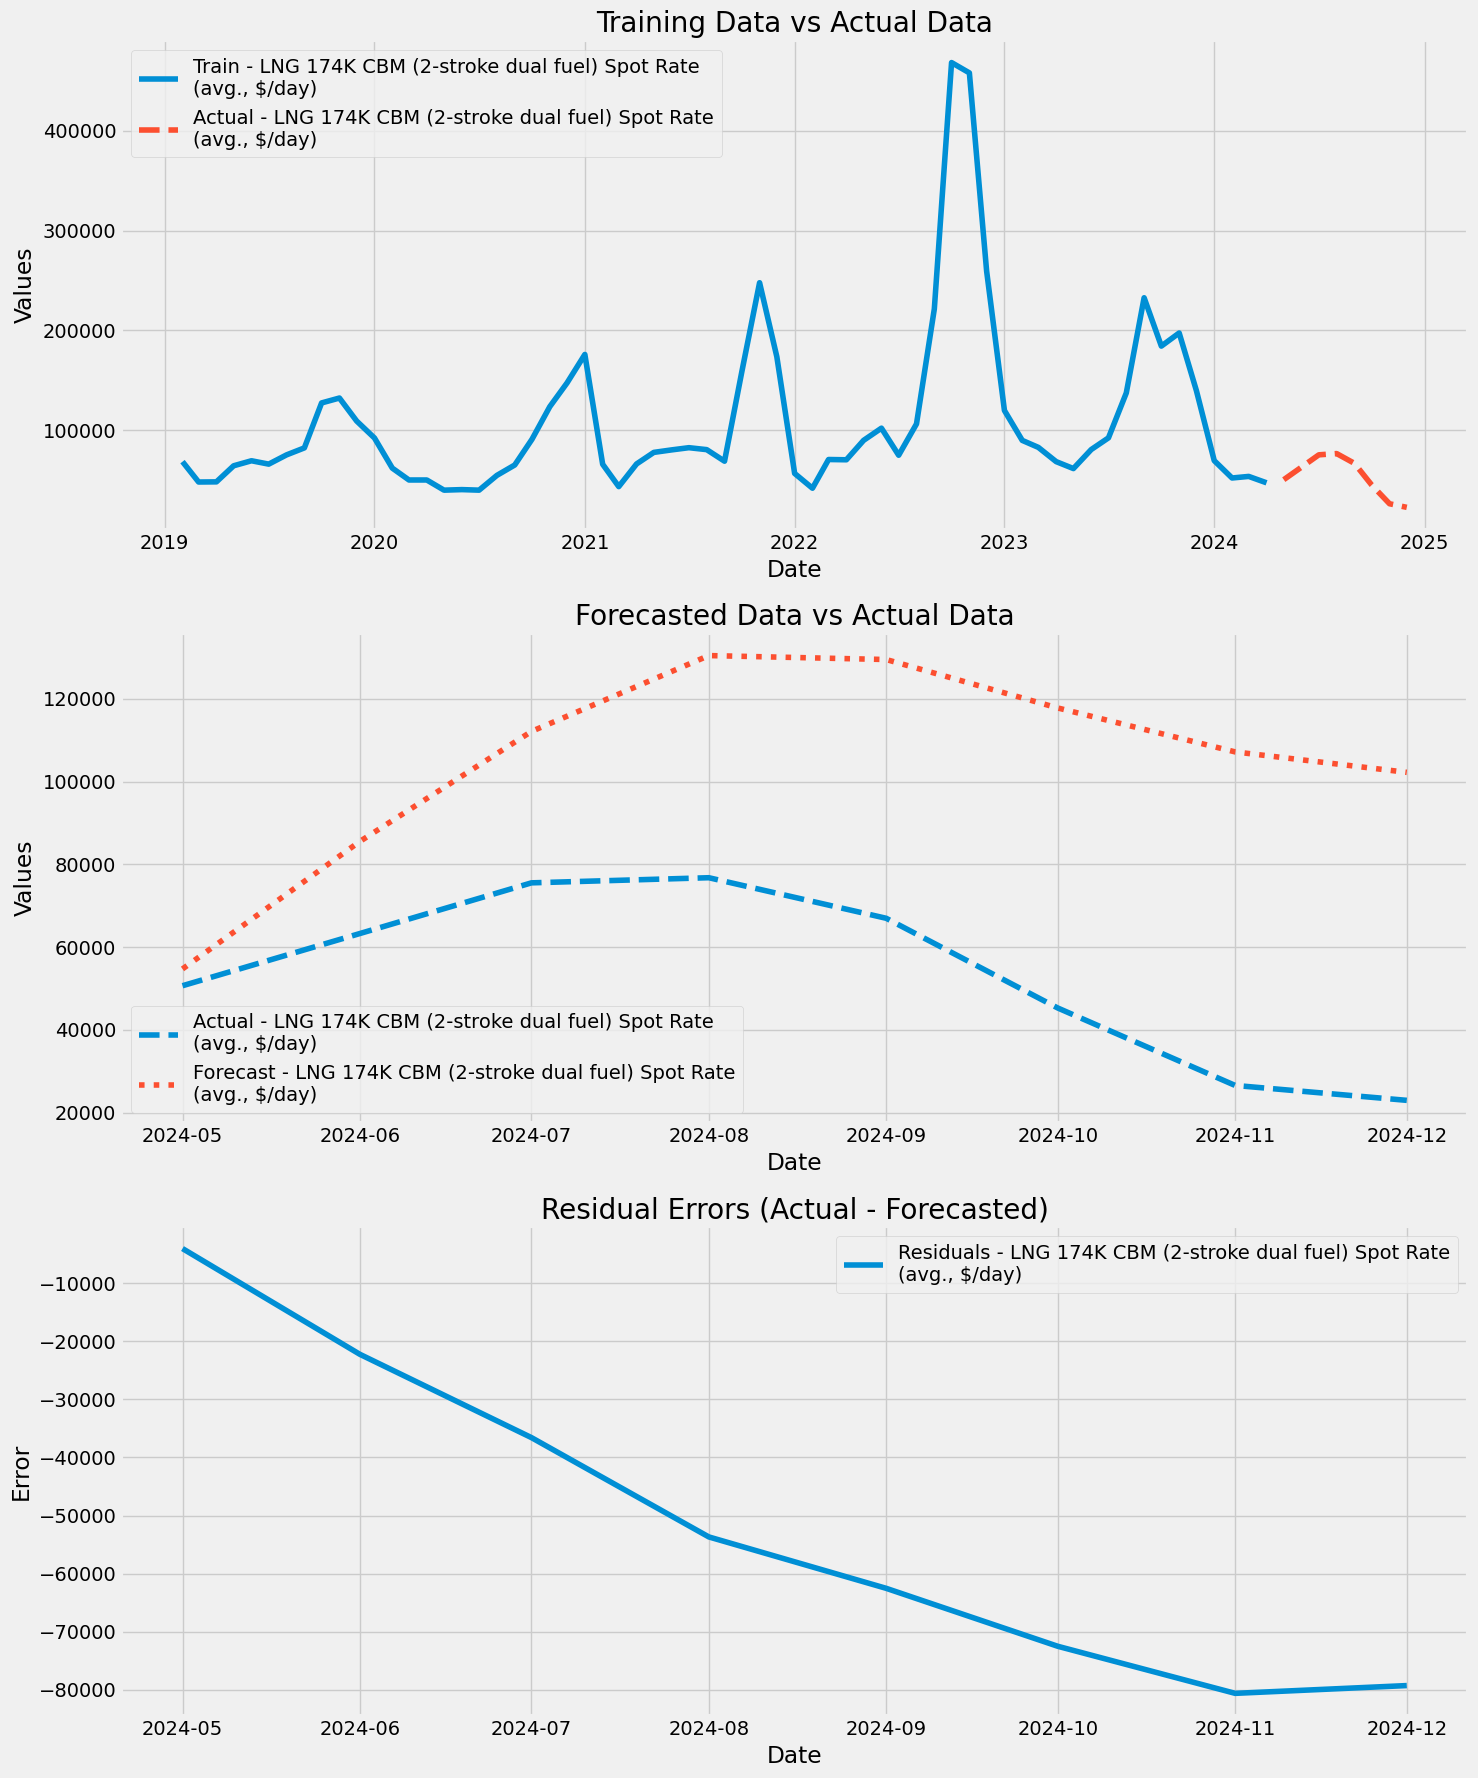

In [51]:
train_size = int(len(data) * 0.9)
train, test = data[0:train_size], data[train_size:]

model = VAR(train)
model_fit = model.fit(maxlags=2)

lag_order = model_fit.k_ar
forecast = model_fit.forecast(train.values[-lag_order:], len(test))

forecast_df = pd.DataFrame(forecast, index=data.index[train_size:], columns=data.columns)
forecast_df = forecast_df.clip(lower=0)

mse_values = {col: mean_squared_error(test[col], forecast_df[col]) for col in data.columns}
print("mean_squared_error:", mse_values)


#print(data.columns)

plotcolumns = ['LNG 174K CBM (2-stroke dual fuel) Spot Rate\n(avg., $/day)']
fig, axes = plt.subplots(3, 1, figsize=(15, 18))


axes[0].set_title("Training Data vs Actual Data")
for col in plotcolumns:
    axes[0].plot(train.index, train[col], label=f"Train - {col}")
    axes[0].plot(test.index, test[col], label=f"Actual - {col}", linestyle="dashed")
axes[0].legend()
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Values")
axes[0].grid(True)


axes[1].set_title("Forecasted Data vs Actual Data")
for col in plotcolumns:
    axes[1].plot(test.index, test[col], label=f"Actual - {col}", linestyle="dashed")
    axes[1].plot(forecast_df.index, forecast_df[col], label=f"Forecast - {col}", linestyle="dotted")
axes[1].legend()
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Values")
axes[1].grid(True)


axes[2].set_title("Residual Errors (Actual - Forecasted)")
for col in plotcolumns:
    residuals = test[col] - forecast_df[col]
    axes[2].plot(residuals.index, residuals, label=f"Residuals - {col}")
axes[2].legend()
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Error")
axes[2].grid(True)


plt.tight_layout()
plt.show()